In [14]:

###In the default environment
###Importing the concise package for easy plotting of multi modal dna data modalities
import concise

In [15]:
from concise.utils.plot import seqlogo_fig, VOCABS

In [16]:
import numpy as np

In [17]:
arr = np.random.random((10, 5))

In [18]:
arr = arr / arr.sum(axis=1)[:,np.newaxis]

In [19]:
from concise.data.hocomoco import get_metadata, get_pwm_list

In [20]:
from collections import OrderedDict

In [169]:
VOCABS['meth'] = OrderedDict([("A", "green"),
                          ("C", "blue"),
                          ("G", "orange"),
                          ("T", "red"),
                          ("M", "black")])
VOCABS['default']=OrderedDict([("A", "green"),
                          ("C", "blue"),
                          ("G", "orange"),
                          ("T", "red")
                          ])

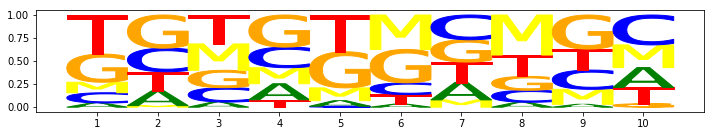

In [22]:
seqlogo_fig(arr, "meth")

In [11]:
pfm_info=np.array([[-0.01386559, -0.01386559,  0.2687016 ,  0.75029914],
       [-0.06393942, -0.06393942, -0.06393942,  0.2687016 ],
       [-0.06393942,  0.2687016 ,  0.2687016 , -0.01386559],
       [ 0.75029914, -0.01386559, -0.01386559,  0.2687016 ],
       [-0.01386559, -0.01386559,  1.97949282, -0.01386559],
       [ 0.2687016 , -0.06393942, -0.06393942, -0.06393942],
       [ 0.2687016 , -0.06393942,  0.2687016 , -0.01386559],
       [ 0.2687016 , -0.06393942,  0.2687016 , -0.01386559],
       [ 1.32882538, -0.06393942, -0.01386559, -0.01386559],
       [-0.01386559, -0.01386559, -0.01386559,  1.97949282],
       [-0.01386559, -0.01386559, -0.06393942,  1.32882538],
       [ 0.2687016 , -0.01386559,  0.75029914, -0.01386559],
       [-0.01386559,  1.32882538, -0.01386559, -0.06393942],
       [ 0.2687016 , -0.01386559,  0.2687016 , -0.06393942],
       [-0.06393942,  0.2687016 , -0.01386559,  0.2687016 ],
       [ 1.32882538, -0.06393942, -0.01386559, -0.01386559],
       [ 1.32882538, -0.01386559, -0.06393942, -0.01386559],
       [-0.01386559,  1.32882538, -0.01386559, -0.06393942],
       [ 0.2687016 , -0.06393942, -0.01386559,  0.2687016 ],
       [-0.06393942,  0.2687016 , -0.01386559,  0.2687016 ],
       [-0.06393942,  0.2687016 , -0.01386559,  0.2687016 ],
       [-0.06393942, -0.06393942, -0.06393942,  0.2687016 ],
       [ 0.2687016 , -0.01386559, -0.06393942,  0.2687016 ],
       [-0.06393942, -0.01386559,  0.75029914, -0.06393942]])

In [23]:
from pwm_utils import *

In [24]:
import numpy as np

In [57]:
counts = np.load('intervals_to_evaluate/_counts_CEBPB_H1_seq_meth.npy')

In [89]:
pfm_counts = np.load('intervals_to_evaluate/_pfm_counts_CEBPB_H1_seq_meth.npy')

In [32]:
for i in range(len(counts)):
    seqlogo_fig(pfm_counts[:,:,i].transpose()/counts[i],"meth")

/users/manyu/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


/users/manyu/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


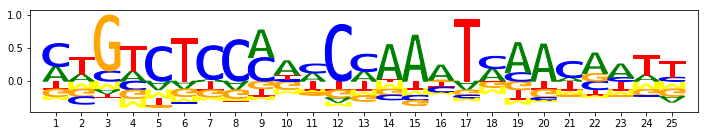

In [49]:
i=8
seqlogo_fig(get_information_content_matrix(pfm_with_pseudocount(pfm_counts[:,:,i].transpose()/counts[i])),"meth")

In [72]:
def process_seq_meth_counts(pfm_counts_matrices,counts):
    pfm_processed = np.zeros(pfm_counts_matrices.shape)
    for i in range(len(counts)):
        pfm = pfm_counts_matrices[:,:,i]/counts[i]
        print(pfm.shape)
        pfm_seq = pfm[0:4,:]
        print(pfm_seq.shape)
        
        pfm_meth = pfm[4:5,:]
        print(pfm_meth.shape)
        pfm_seq_info = get_information_content_matrix(pfm_with_pseudocount(pfm_seq))
        pfm_recalibrated = np.concatenate((pfm_seq_info,pfm_meth),axis=0)
        assert pfm_recalibrated.shape == pfm_counts_matrices[:,:,0].shape
        pfm_processed[:,:,i] = pfm_recalibrated
        return pfm_processed
        
        
        
    

In [73]:
pfm_info_recal = process_seq_meth_counts(pfm_counts,counts)

(5, 25)
(4, 25)
(1, 25)


/users/manyu/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


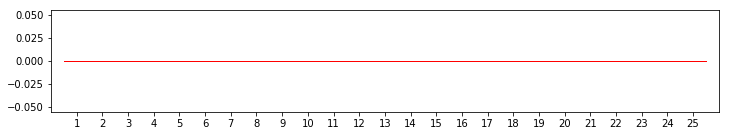

In [87]:
seqlogo_fig(pfm_info_recal[:,:,4].transpose(),"meth")

/users/manyu/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


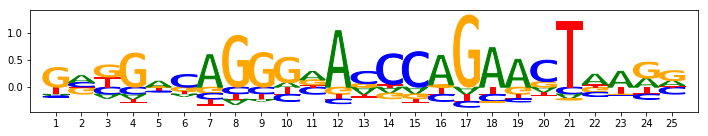

In [163]:
i=25
pfm_info = get_information_content_matrix(pfm_with_pseudocount((pfm_counts[:,:,i]/counts[i])[0:4]))
seqlogo_fig(pfm_info.transpose(),"default")

In [165]:
pfm_info_filter30_seq_meth = np.array([[ 5.85432621e-02, -5.96344703e-02,  8.88438710e-02,
         5.79334675e-03,  6.84692621e-02,  2.99851542e-01,
        -7.07386273e-02,  7.27254206e-01, -1.06746667e-01,
        -3.60052992e-02, -1.31981915e-01, -1.31981915e-01,
         5.51714774e-01,  2.65748856e-01,  5.66715149e-01,
         1.10504271e+00, -6.57663069e-02,  2.00348626e-01,
         1.02803094e-01, -5.70174465e-03,  2.24421786e-01,
        -1.68244445e-02, -4.04229679e-02, -1.31490332e-01,
        -8.50371292e-02],
       [-5.73284019e-02,  2.37088495e-02,  8.88438710e-02,
         1.76491429e-02,  2.06681512e-02, -4.78290851e-02,
        -1.23993206e-01, -1.16843526e-01, -7.04668374e-02,
        -5.53031373e-02, -4.94354893e-02,  1.17667479e+00,
        -9.60580039e-02,  1.27929952e-01,  2.12315860e-01,
        -6.41622156e-02,  4.30671597e-01,  8.54005707e-02,
        -1.10262909e-01, -6.41622156e-02,  4.23995961e-02,
         4.11989700e-01, -1.28980232e-01,  4.55877065e-02,
        -9.25162863e-02],
       [ 2.36664210e-01,  1.88522352e-01, -1.24325773e-01,
        -7.07386273e-02,  1.69131541e-01, -1.15606700e-01,
         6.12298653e-01,  2.06681512e-02, -1.32596714e-01,
        -1.28036173e-01,  8.85930969e-01, -1.26866851e-01,
        -1.40793491e-02, -1.90834095e-02, -1.26191657e-01,
        -1.04342143e-01, -1.19194294e-01, -1.30183630e-01,
         9.92856242e-02,  1.16768586e-02, -8.11055650e-02,
        -1.23387253e-01, -1.21377220e-01,  2.32568368e-01,
         2.61550102e-01],
       [-1.26066308e-01, -9.43039519e-02,  1.76491429e-02,
         6.18322217e-02, -1.32681057e-01, -2.75622833e-02,
        -6.41622156e-02, -3.60052992e-02,  1.50581941e+00,
         1.70066455e+00,  1.46519896e-02, -1.16787877e-01,
        -1.28832218e-01,  3.29594714e-02, -1.01790176e-01,
        -1.04342143e-01,  2.20371204e-01,  8.72392010e-03,
        -3.53551112e-02,  7.18170751e-02, -1.02729975e-01,
        -9.43039519e-02,  5.81813314e-01, -2.22422836e-02,
         2.88531399e-03],
       [ 1.90769864e-02,  1.45544660e-02,  1.39483833e-02,
         4.49983522e-02,  3.78055303e-02,  3.32619426e-02,
         4.02966968e-02,  6.92489511e-03,  5.61072711e-04,
         1.48055556e-03,  1.08587281e-02,  1.26046300e-01,
         1.13629213e-01,  6.78430633e-03,  3.80369141e-03,
         1.34906324e-02,  2.11143813e-02,  1.14489602e-02,
         2.17674896e-02,  2.06324238e-02,  9.54043043e-03,
         2.19678992e-02,  2.12932083e-02,  2.77044899e-02,
         2.92091875e-02]])

/users/manyu/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


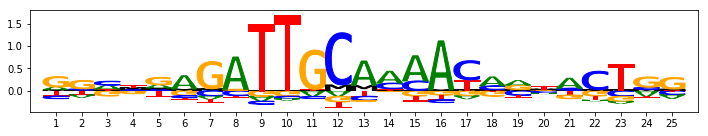

In [171]:
seqlogo_fig(pfm_info_filter30_seq_meth.transpose(),"meth")

In [167]:
pfm_filter30_seq_meth = np.array([[2.87848606e-01, 2.04183267e-01, 3.05776892e-01, 2.53984064e-01,
        2.93824701e-01, 4.13346614e-01, 1.94223108e-01, 5.88645418e-01,
        4.08366534e-02, 6.97211155e-03, 8.26693227e-02, 8.26693227e-02,
        5.20916335e-01, 3.97410359e-01, 5.26892430e-01, 7.22111554e-01,
        1.69322709e-02, 3.65537849e-01, 3.13745020e-01, 2.46015936e-01,
        3.77490040e-01, 2.38047809e-01, 2.20119522e-01, 1.04581673e-01,
        1.80278884e-01],
       [2.06175299e-01, 2.65936255e-01, 3.05776892e-01, 2.61952191e-01,
        2.63944223e-01, 2.14143426e-01, 6.07569721e-02, 1.40438247e-01,
        1.89243028e-02, 1.29482072e-02, 1.09561753e-02, 7.46015936e-01,
        1.68326693e-01, 3.27689243e-01, 3.71513944e-01, 2.00199203e-01,
        4.71115538e-01, 3.03784861e-01, 1.50398406e-01, 2.00199203e-01,
        2.77888446e-01, 4.63147410e-01, 1.14541833e-01, 2.79880478e-01,
        1.72310757e-01],
       [3.83466135e-01, 3.59561753e-01, 1.26494024e-01, 1.94223108e-01,
        3.49601594e-01, 1.42430279e-01, 5.44820717e-01, 2.63944223e-01,
        8.86454183e-02, 6.87250996e-02, 6.46414343e-01, 1.20517928e-01,
        2.40039841e-01, 2.98804781e-03, 6.47410359e-02, 3.88446215e-02,
        1.36454183e-01, 7.47011952e-02, 3.11752988e-01, 2.57968127e-01,
        1.84262948e-01, 1.28486056e-01, 1.32470120e-01, 3.81474104e-01,
        3.95418327e-01],
       [1.22509960e-01, 1.70318725e-01, 2.61952191e-01, 2.89840637e-01,
        9.26294821e-02, 2.30079681e-01, 2.00199203e-01, 6.97211155e-03,
        8.51593625e-01, 9.11354582e-01, 2.59960159e-01, 5.07968127e-02,
        7.07171315e-02, 2.71912351e-01, 3.68525896e-02, 3.88446215e-02,
        3.75498008e-01, 2.55976096e-01, 2.24103586e-01, 2.95816733e-01,
        1.60358566e-01, 1.70318725e-01, 5.32868526e-01, 2.34063745e-01,
        2.51992032e-01],
       [1.90769864e-02, 1.45544660e-02, 1.39483833e-02, 4.49983522e-02,
        3.78055303e-02, 3.32619426e-02, 4.02966968e-02, 6.92489511e-03,
        5.61072711e-04, 1.48055556e-03, 1.08587281e-02, 1.26046300e-01,
        1.13629213e-01, 6.78430633e-03, 3.80369141e-03, 1.34906324e-02,
        2.11143813e-02, 1.14489602e-02, 2.17674896e-02, 2.06324238e-02,
        9.54043043e-03, 2.19678992e-02, 2.12932083e-02, 2.77044899e-02,
        2.92091875e-02]])

/users/manyu/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


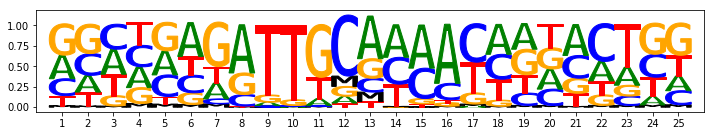

In [186]:
seqlogo_fig(pfm_filter30_seq_meth.transpose(),"meth")

In [187]:
pfm_filter18_seq_meth_shallow=np.array([[2.02777778e-01, 1.63888889e-01, 2.41666667e-01, 1.75000000e-01,
        3.16666667e-01, 1.83333333e-01, 1.69444444e-01, 1.91666667e-01,
        3.02777778e-01, 2.16666667e-01, 1.80555556e-01, 2.22222222e-01,
        2.33333333e-01, 3.05555556e-01, 2.08333333e-01, 5.08333333e-01,
        0.00000000e+00, 0.00000000e+00, 8.88888889e-02, 4.44444444e-02,
        2.38888889e-01, 1.22222222e-01, 6.50000000e-01, 9.91666667e-01,
        1.11111111e-02, 2.05555556e-01, 2.11111111e-01, 2.00000000e-01,
        2.86111111e-01, 1.69444444e-01, 1.86111111e-01, 1.86111111e-01,
        2.25000000e-01, 3.36111111e-01, 2.27777778e-01],
       [2.88888889e-01, 2.30555556e-01, 2.27777778e-01, 3.75000000e-01,
        2.36111111e-01, 2.75000000e-01, 2.16666667e-01, 2.05555556e-01,
        2.19444444e-01, 2.02777778e-01, 3.47222222e-01, 2.86111111e-01,
        2.00000000e-01, 2.88888889e-01, 1.19444444e-01, 1.41666667e-01,
        5.55555556e-03, 0.00000000e+00, 0.00000000e+00, 8.47222222e-01,
        7.77777778e-02, 5.55555556e-01, 3.50000000e-01, 0.00000000e+00,
        3.11111111e-01, 3.88888889e-01, 2.22222222e-01, 3.75000000e-01,
        2.30555556e-01, 3.36111111e-01, 2.86111111e-01, 3.80555556e-01,
        3.16666667e-01, 2.55555556e-01, 2.47222222e-01],
       [1.91666667e-01, 2.66666667e-01, 3.25000000e-01, 2.08333333e-01,
        2.55555556e-01, 3.44444444e-01, 2.30555556e-01, 3.80555556e-01,
        2.72222222e-01, 3.50000000e-01, 2.69444444e-01, 2.30555556e-01,
        4.36111111e-01, 2.11111111e-01, 3.83333333e-01, 3.36111111e-01,
        0.00000000e+00, 4.44444444e-02, 8.30555556e-01, 1.94444444e-02,
        6.13888889e-01, 0.00000000e+00, 0.00000000e+00, 2.77777778e-03,
        1.38888889e-01, 1.08333333e-01, 2.69444444e-01, 1.91666667e-01,
        2.86111111e-01, 2.44444444e-01, 1.83333333e-01, 2.44444444e-01,
        2.19444444e-01, 2.33333333e-01, 3.11111111e-01],
       [3.16666667e-01, 3.38888889e-01, 2.05555556e-01, 2.41666667e-01,
        1.91666667e-01, 1.97222222e-01, 3.83333333e-01, 2.22222222e-01,
        2.05555556e-01, 2.30555556e-01, 2.02777778e-01, 2.61111111e-01,
        1.30555556e-01, 1.94444444e-01, 2.88888889e-01, 1.38888889e-02,
        9.94444444e-01, 9.55555556e-01, 8.05555556e-02, 8.88888889e-02,
        6.94444444e-02, 3.22222222e-01, 0.00000000e+00, 5.55555556e-03,
        5.38888889e-01, 2.97222222e-01, 2.97222222e-01, 2.33333333e-01,
        1.97222222e-01, 2.50000000e-01, 3.44444444e-01, 1.88888889e-01,
        2.38888889e-01, 1.75000000e-01, 2.13888889e-01],
       [2.79198564e-02, 2.91110989e-02, 1.80868299e-02, 2.07705625e-02,
        3.36983370e-02, 3.57292872e-02, 2.26604486e-02, 3.24985809e-02,
        1.96661979e-02, 9.63147872e-03, 2.35561604e-02, 8.11751011e-02,
        7.14099258e-02, 2.22211738e-02, 3.66991473e-02, 1.77547329e-02,
        0.00000000e+00, 5.07054685e-04, 9.86716527e-03, 3.41159268e-01,
        3.36817210e-01, 6.37540310e-03, 2.02652094e-03, 0.00000000e+00,
        8.54046201e-03, 1.31964403e-02, 2.67334041e-02, 4.37299774e-02,
        3.09154045e-02, 2.62175573e-02, 2.23462129e-02, 1.91692885e-02,
        2.80810094e-02, 2.73173856e-02, 2.51142724e-02]])

/users/manyu/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


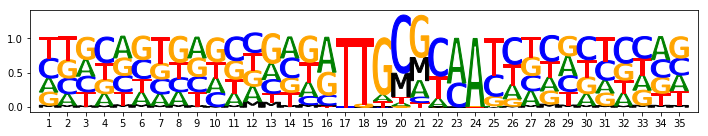

In [188]:
seqlogo_fig(pfm_filter18_seq_meth_shallow.transpose(),"meth")

In [189]:
pfm_filter12_seq_meth_shallow=np.array([[0.22847682, 0.3410596 , 0.22516556, 0.22516556, 0.24834437,
        0.21192053, 0.20529801, 0.31125828, 0.2218543 , 0.1986755 ,
        0.24834437, 0.19205298, 0.22847682, 0.20529801, 0.29470199,
        0.21854305, 0.25827815, 0.17880795, 0.3410596 , 0.14900662,
        0.20529801, 0.24172185, 0.3013245 , 0.25827815, 0.1192053 ,
        0.59933775, 0.        , 0.        , 0.05298013, 0.01986755,
        0.36423841, 0.12913907, 0.52649007, 0.97350993, 0.02649007],
       [0.21854305, 0.20529801, 0.20529801, 0.25496689, 0.29139073,
        0.25827815, 0.2384106 , 0.2218543 , 0.23509934, 0.32119205,
        0.31456954, 0.29139073, 0.19205298, 0.35761589, 0.2384106 ,
        0.22847682, 0.18543046, 0.20860927, 0.1986755 , 0.18543046,
        0.30463576, 0.29801325, 0.22847682, 0.26821192, 0.17880795,
        0.16887417, 0.04304636, 0.        , 0.        , 0.94370861,
        0.02649007, 0.45364238, 0.46688742, 0.01655629, 0.40066225],
       [0.32450331, 0.28145695, 0.35761589, 0.26490066, 0.18211921,
        0.26821192, 0.32781457, 0.21523179, 0.33774834, 0.32450331,
        0.17218543, 0.24172185, 0.36092715, 0.18543046, 0.3013245 ,
        0.35099338, 0.22516556, 0.33774834, 0.25165563, 0.41721854,
        0.2615894 , 0.23178808, 0.33774834, 0.20529801, 0.42384106,
        0.20198675, 0.00331126, 0.        , 0.81788079, 0.01324503,
        0.5       , 0.02317881, 0.00331126, 0.00993377, 0.14238411],
       [0.22847682, 0.17218543, 0.21192053, 0.25496689, 0.2781457 ,
        0.2615894 , 0.22847682, 0.25165563, 0.20529801, 0.15562914,
        0.26490066, 0.27483444, 0.21854305, 0.25165563, 0.16556291,
        0.20198675, 0.33112583, 0.27483444, 0.20860927, 0.24834437,
        0.22847682, 0.22847682, 0.13245033, 0.26821192, 0.2781457 ,
        0.02980132, 0.95364238, 1.        , 0.12913907, 0.02317881,
        0.10927152, 0.39403974, 0.00331126, 0.        , 0.43046358],
       [0.03322368, 0.03426666, 0.02209379, 0.0111711 , 0.06255009,
        0.08338326, 0.03864836, 0.0300921 , 0.02910358, 0.0310524 ,
        0.04585332, 0.04098737, 0.02437416, 0.02137477, 0.04128733,
        0.03990434, 0.02045675, 0.02662431, 0.02089427, 0.02102455,
        0.02574624, 0.08829173, 0.07760938, 0.02817949, 0.05202538,
        0.03250121, 0.0034116 , 0.        , 0.01256051, 0.36590559,
        0.35838475, 0.00487754, 0.00710168, 0.00270921, 0.00904627]])

/users/manyu/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


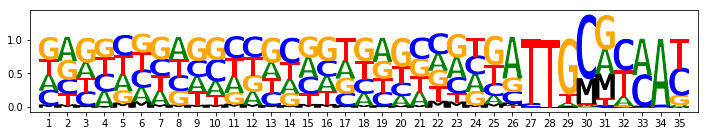

In [190]:
seqlogo_fig(pfm_filter12_seq_meth_shallow.transpose(),"meth")

In [191]:
pfm_filter27_seq_meth_shallow=np.array([[0.238     , 0.23      , 0.166     , 0.248     , 0.354     ,
        0.132     , 0.17      , 0.        , 0.        , 0.164     ,
        0.06      , 0.166     , 0.156     , 0.078     , 0.26      ,
        0.21      , 0.188     , 0.244     , 0.252     , 0.134     ,
        0.172     , 0.16      , 0.226     , 0.262     , 0.188     ,
        0.148     , 0.2       , 0.166     , 0.142     , 0.162     ,
        0.2       , 0.29      , 0.296     , 0.1       , 0.214     ],
       [0.362     , 0.246     , 0.236     , 0.28      , 0.2       ,
        0.368     , 0.396     , 1.        , 0.        , 0.374     ,
        0.412     , 0.478     , 0.458     , 0.468     , 0.26      ,
        0.31      , 0.306     , 0.398     , 0.368     , 0.306     ,
        0.21      , 0.352     , 0.392     , 0.328     , 0.416     ,
        0.386     , 0.348     , 0.334     , 0.388     , 0.34      ,
        0.338     , 0.328     , 0.224     , 0.352     , 0.42      ],
       [0.242     , 0.412     , 0.366     , 0.28      , 0.276     ,
        0.424     , 0.308     , 0.        , 1.        , 0.322     ,
        0.392     , 0.2       , 0.158     , 0.202     , 0.256     ,
        0.3       , 0.312     , 0.16      , 0.26      , 0.402     ,
        0.42      , 0.406     , 0.248     , 0.272     , 0.22      ,
        0.258     , 0.288     , 0.194     , 0.222     , 0.318     ,
        0.252     , 0.24      , 0.278     , 0.274     , 0.118     ],
       [0.158     , 0.112     , 0.232     , 0.192     , 0.17      ,
        0.076     , 0.126     , 0.        , 0.        , 0.14      ,
        0.136     , 0.156     , 0.228     , 0.252     , 0.224     ,
        0.18      , 0.194     , 0.198     , 0.12      , 0.158     ,
        0.198     , 0.082     , 0.134     , 0.138     , 0.176     ,
        0.208     , 0.164     , 0.306     , 0.248     , 0.18      ,
        0.21      , 0.142     , 0.202     , 0.274     , 0.248     ],
       [0.02397762, 0.0180154 , 0.00354997, 0.00924682, 0.00387925,
        0.00373934, 0.00384043, 0.51760542, 0.50381146, 0.03654953,
        0.04174479, 0.01159281, 0.02817414, 0.02704236, 0.02039023,
        0.01203451, 0.00646045, 0.00592574, 0.02997925, 0.08989983,
        0.06652171, 0.02303198, 0.04634773, 0.05218561, 0.05325507,
        0.03349852, 0.01522701, 0.00374892, 0.01325773, 0.01289882,
        0.00345973, 0.00918468, 0.021815  , 0.017449  , 0.02619771]])


/users/manyu/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


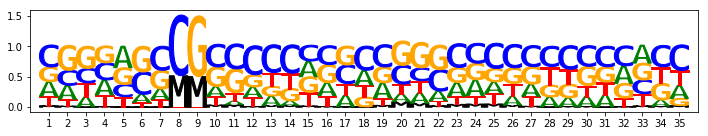

In [192]:
seqlogo_fig(pfm_filter27_seq_meth_shallow.transpose(),"meth")

In [193]:
pfm_filter48_seq_meth_shallow=np.array([[0.04571429, 0.01142857, 0.16571429, 0.02285714, 0.74285714,
        0.24571429, 0.01142857, 0.90285714, 0.06285714, 0.19428571,
        0.24571429, 0.24      , 0.28571429, 0.13714286, 0.21142857,
        0.29142857, 0.30285714, 0.36      , 0.23428571, 0.20571429,
        0.20571429, 0.24      , 0.25714286, 0.21142857, 0.24      ,
        0.25142857, 0.16571429, 0.36571429, 0.32      , 0.30285714,
        0.18857143, 0.25714286, 0.22285714, 0.21714286, 0.25714286],
       [0.        , 0.06857143, 0.00571429, 0.97142857, 0.        ,
        0.        , 0.83428571, 0.01142857, 0.38285714, 0.42857143,
        0.28571429, 0.33142857, 0.22857143, 0.29142857, 0.30285714,
        0.21714286, 0.21714286, 0.17142857, 0.26857143, 0.30857143,
        0.30285714, 0.18285714, 0.20571429, 0.26857143, 0.20571429,
        0.28571429, 0.24571429, 0.23428571, 0.36571429, 0.28571429,
        0.34857143, 0.32571429, 0.32571429, 0.32      , 0.27428571],
       [0.00571429, 0.00571429, 0.76571429, 0.00571429, 0.18285714,
        0.02285714, 0.07428571, 0.05142857, 0.12      , 0.05714286,
        0.25714286, 0.19428571, 0.25714286, 0.31428571, 0.19428571,
        0.28      , 0.22857143, 0.32      , 0.32      , 0.21142857,
        0.22285714, 0.29142857, 0.36      , 0.28571429, 0.35428571,
        0.24      , 0.38285714, 0.24      , 0.17142857, 0.14857143,
        0.28      , 0.16571429, 0.28      , 0.2       , 0.27428571],
       [0.94857143, 0.91428571, 0.06285714, 0.        , 0.07428571,
        0.73142857, 0.08      , 0.03428571, 0.43428571, 0.32      ,
        0.21142857, 0.23428571, 0.22857143, 0.25714286, 0.29142857,
        0.21142857, 0.25142857, 0.14857143, 0.17714286, 0.27428571,
        0.26857143, 0.28571429, 0.17714286, 0.23428571, 0.2       ,
        0.22285714, 0.20571429, 0.16      , 0.14285714, 0.26285714,
        0.18285714, 0.25142857, 0.17142857, 0.26285714, 0.19428571],
       [0.        , 0.03099361, 0.03933823, 0.11337847, 0.10859755,
        0.        , 0.02619469, 0.01706227, 0.00734043, 0.02969361,
        0.04850135, 0.03680096, 0.02351834, 0.01261571, 0.03474055,
        0.03906992, 0.02244835, 0.02587682, 0.02520481, 0.02834442,
        0.0166355 , 0.00535445, 0.00643676, 0.01195092, 0.01837467,
        0.05019595, 0.04999604, 0.02110956, 0.03005439, 0.01685382,
        0.0188796 , 0.03290147, 0.02715574, 0.04388789, 0.03325871]])

/users/manyu/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


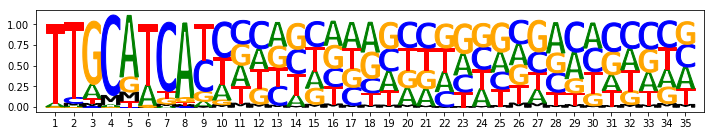

In [194]:
seqlogo_fig(pfm_filter48_seq_meth_shallow.transpose(),"meth")

In [195]:
pfm_filter0_seq_meth_shallow=np.array([[1.29411765e-01, 1.94117647e-01, 2.82352941e-01, 2.52941176e-01,
        2.47058824e-01, 2.41176471e-01, 2.70588235e-01, 2.23529412e-01,
        2.23529412e-01, 2.17647059e-01, 3.11764706e-01, 1.82352941e-01,
        1.94117647e-01, 2.17647059e-01, 1.76470588e-01, 1.82352941e-01,
        1.88235294e-01, 3.35294118e-01, 2.17647059e-01, 2.00000000e-01,
        2.29411765e-01, 1.88235294e-01, 3.47058824e-01, 3.82352941e-01,
        2.94117647e-02, 5.88235294e-03, 7.11764706e-01, 8.82352941e-02,
        0.00000000e+00, 5.88235294e-02, 8.23529412e-01, 9.47058824e-01,
        1.17647059e-02, 1.76470588e-01, 2.82352941e-01],
       [3.11764706e-01, 3.76470588e-01, 2.17647059e-01, 3.11764706e-01,
        2.82352941e-01, 3.29411765e-01, 2.52941176e-01, 3.29411765e-01,
        3.11764706e-01, 3.64705882e-01, 3.05882353e-01, 1.47058824e-01,
        1.70588235e-01, 3.70588235e-01, 1.94117647e-01, 2.05882353e-01,
        2.00000000e-01, 2.00000000e-01, 1.76470588e-01, 2.17647059e-01,
        1.52941176e-01, 3.58823529e-01, 8.23529412e-02, 1.58823529e-01,
        0.00000000e+00, 0.00000000e+00, 2.94117647e-02, 2.70588235e-01,
        5.88235294e-03, 7.58823529e-01, 1.58823529e-01, 3.52941176e-02,
        2.76470588e-01, 5.70588235e-01, 1.88235294e-01],
       [2.11764706e-01, 1.70588235e-01, 1.82352941e-01, 2.70588235e-01,
        1.82352941e-01, 1.58823529e-01, 2.47058824e-01, 2.35294118e-01,
        2.35294118e-01, 2.47058824e-01, 2.11764706e-01, 4.52941176e-01,
        4.82352941e-01, 2.52941176e-01, 3.11764706e-01, 3.88235294e-01,
        4.41176471e-01, 2.05882353e-01, 4.23529412e-01, 3.11764706e-01,
        4.41176471e-01, 2.70588235e-01, 3.35294118e-01, 4.47058824e-01,
        5.88235294e-03, 9.41176471e-01, 1.17647059e-02, 7.05882353e-02,
        9.70588235e-01, 1.76470588e-02, 5.88235294e-03, 1.17647059e-02,
        1.23529412e-01, 1.41176471e-01, 2.58823529e-01],
       [3.47058824e-01, 2.58823529e-01, 3.17647059e-01, 1.64705882e-01,
        2.88235294e-01, 2.70588235e-01, 2.29411765e-01, 2.11764706e-01,
        2.29411765e-01, 1.70588235e-01, 1.70588235e-01, 2.17647059e-01,
        1.52941176e-01, 1.58823529e-01, 3.17647059e-01, 2.23529412e-01,
        1.70588235e-01, 2.58823529e-01, 1.82352941e-01, 2.70588235e-01,
        1.76470588e-01, 1.82352941e-01, 2.35294118e-01, 1.17647059e-02,
        9.64705882e-01, 5.29411765e-02, 2.47058824e-01, 5.70588235e-01,
        2.35294118e-02, 1.64705882e-01, 1.17647059e-02, 5.88235294e-03,
        5.88235294e-01, 1.11764706e-01, 2.70588235e-01],
       [3.26432393e-02, 5.52395770e-02, 3.36111710e-02, 2.26424382e-02,
        3.63136813e-02, 7.51214699e-02, 5.53497571e-02, 2.67428038e-02,
        1.69781297e-02, 1.68942428e-02, 4.25908286e-02, 4.71941731e-02,
        1.30831228e-02, 3.43358258e-02, 5.00859681e-02, 3.24684603e-02,
        7.78884297e-03, 4.42169611e-02, 6.84725903e-02, 3.73068230e-02,
        2.88154692e-02, 1.23201754e-02, 8.99746368e-03, 1.08919178e-02,
        0.00000000e+00, 1.11709807e-02, 4.13943367e-04, 1.79291210e-01,
        1.93334551e-01, 1.43150013e-02, 1.14993370e-03, 0.00000000e+00,
        5.56936259e-03, 2.69307686e-02, 2.79000659e-02]])

/users/manyu/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


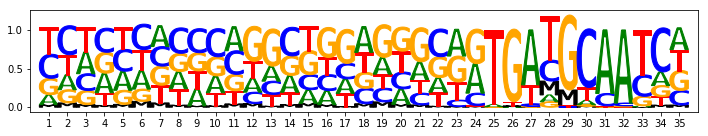

In [197]:
seqlogo_fig(pfm_filter0_seq_meth_shallow.transpose(),"meth")

In [203]:
1

1